# Prediction Daily Bike Demand

Bike sharing program has experienced an exponential growth in the recent years. According to Earth Policy Institute (2017), there are 878 bike sharing programs around the world and bike fleet doubles to 1.084 million from 517,240 from 2013 to 2015. United States (US) was ranked fourth after China, Italy and Spain in terms of number of bike sharing program. There are total of 48 bike sharing program and an estimate 23,000 fleet of bikes in US as of April 2015. The collective benefits of cycling on environment, economy and individual’s health have contributed to the growing popularity of these bike share schemes.

While demand for bicycle sharing is likely to continue in the years ahead, the near-term bikes utilisation rates are hard to anticipate. The mismatch between demand and supply of bikes has dire consequences on companies’ profits as well as the levels of bike user’s satisfaction. Therefore, achieving equilibrium between availability and usage of bikes can help companies to reduce cost and maximize profits.

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Read CSV files

In [3]:
d1 = pd.read_csv('...\\bike assignment\\day.csv')
d1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 1. Data Pre-processing

In [4]:
d1.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
d1['dteday'] = d1['dteday'].astype('datetime64')
d1[['season','yr', 'mnth', 'weekday','weathersit']] = d1[['season','yr', 'mnth','weekday','weathersit']].astype('category')
d1[['holiday','workingday']] = d1[['holiday','workingday']].astype('bool')

map_season = {1:"1_Winter", 2:"2_Spring", 3:"3_Summer", 4:"4_Fall" }
map_weekdays = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
map_weather = {1:"Good", 2:"Normal", 3:"Poor", 4:"very_poor"}

d1["season"] = d1.season.map(map_season)
d1["weekday"] = d1.weekday.map(map_weekdays)
d1["weathersit"] = d1.weathersit.map(map_weather)

#using dates as Index
d1.set_index('dteday', inplace=True)

# 2. Exploratory Data Analysis

In [6]:
#descriptive stats on Numerical Columns
d1.describe(include=['float64'])

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


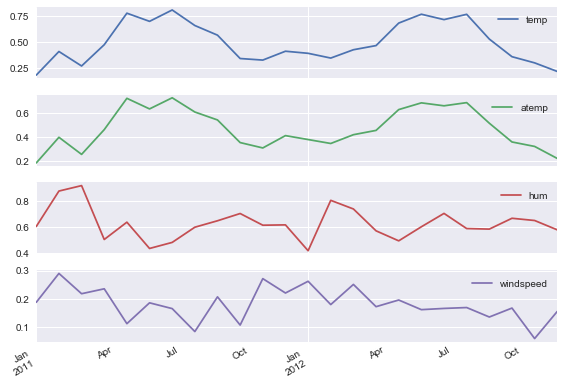

In [7]:
d1.loc[:, 'temp':'windspeed'].asfreq('M').plot(subplots=True)
plt.xlabel("")
plt.tight_layout()
plt.show()

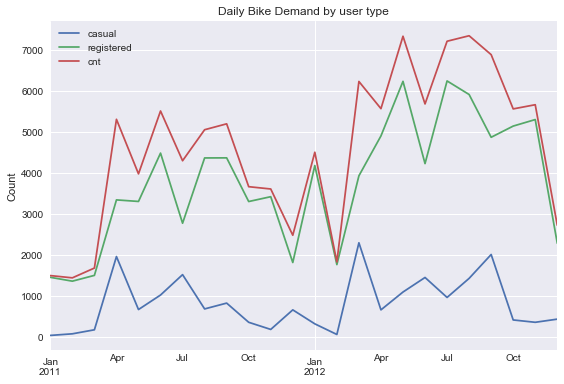

In [8]:
#df_daily[['casual','registered','cnt']].describe()Distribution of dependent / target variable by user type
d1[['casual','registered','cnt']].asfreq('M').plot(title = "Daily Bike Demand by user type")
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#Demand typically peaks in Mar/Apr Period and are low in month of Feb

In [9]:
#on average bike demand by registered users(3656) 4x demand of casual user (848)
d1[['casual','registered','cnt']].describe()

,casual,registered,cnt
count,731.000000,731.000000,731.000000
mean,848.176471,3656.172367,4504.348837
std,686.622488,1560.256377,1937.211452
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5956.000000
max,3410.000000,6946.000000,8714.000000


## Outlier detection

In [10]:
#Bike demand for working day 29th Oct 2012 was exceptionally low due to Hurricane weather 
d1[(d1.cnt == d1.cnt.min())]

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2012-10-29,668,4_Fall,1,10,False,Monday,True,Poor,0.44,0.4394,0.88,0.3582,2,20,22


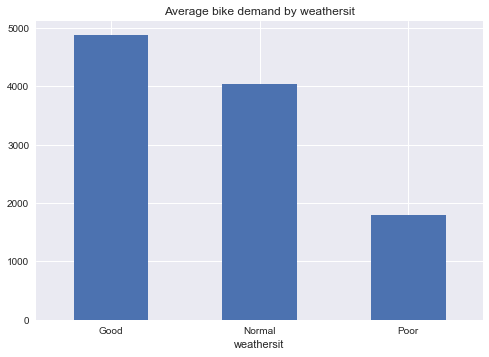

In [11]:
#data suggest that demand for bikes are higher on days when whether condicitons are good
d2=d1.groupby('weathersit').cnt.mean()
d2.plot.bar(x='weathersit', y='cnt', rot=0, title = "Average bike demand by weathersit")
plt.show()

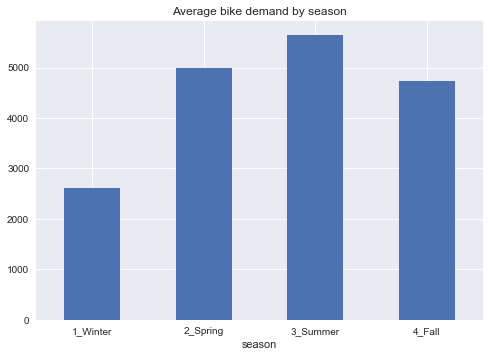

In [12]:
#data suggest that demand for bikes is the highest during the Summer season and lowest during winter 
d2=d1.groupby('season').cnt.mean()
d2.plot.bar(x='season', y='cnt', rot=0, title = "Average bike demand by season")
plt.show()

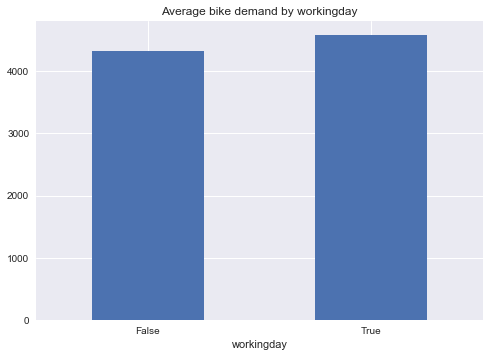

In [13]:
#Demand for bikes is more or less similar on both weekday and weekends 
d2=d1.groupby('workingday').cnt.mean()
d2.plot.bar(x='workingday', y='cnt', rot=0, title = "Average bike demand by workingday")
plt.show()

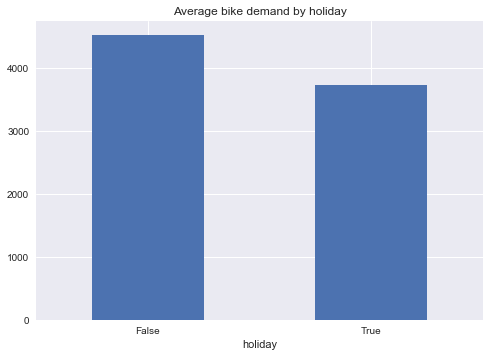

In [14]:
#there are lower demand for bikes is on public holiday
d2=d1.groupby('holiday').cnt.mean()
d2.plot.bar(x='holiday', y='cnt', rot=0, title = "Average bike demand by holiday")
plt.show()

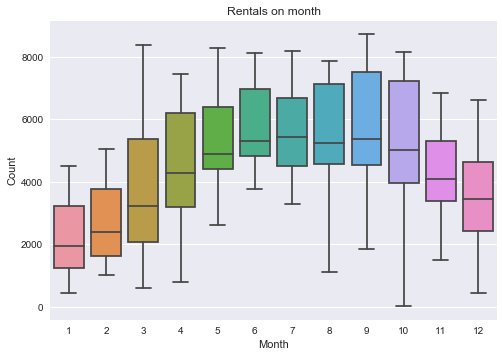

In [15]:
#Bike demands varies widely for month of March and October
sns.boxplot(d1.index.month, d1['cnt'])
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Rentals on month")
plt.show()

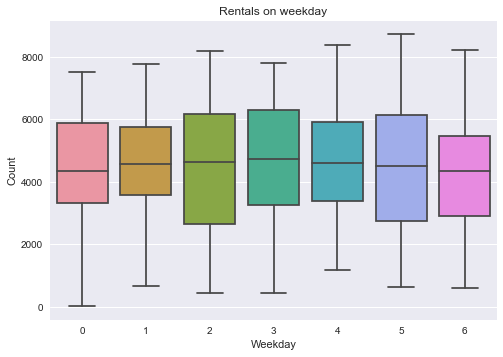

In [16]:
#Bike demands are pretty consistent across weekdays 
sns.boxplot(d1.index.weekday, d1['cnt'])
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.title("Rentals on weekday")
plt.show()

# Correlation between variables

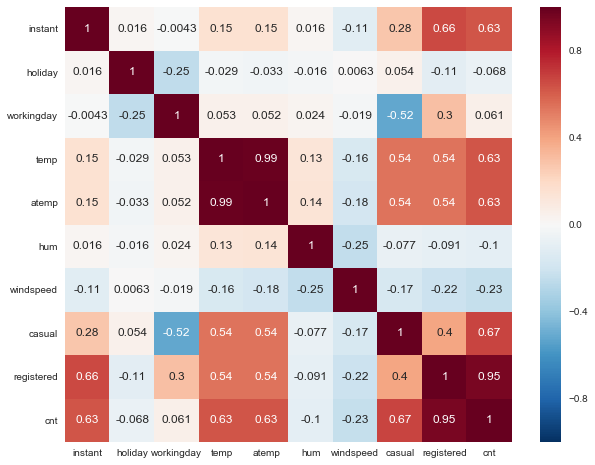

In [17]:
correlation = d1.corr()
fig, axes  = plt.subplots(figsize=(10,8))
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,center=0,ax=axes)
plt.show()

#findings
#1. temp and atemp is perfectly correlated 
#2. temp and atemp are good predictors of Cnt 
#3. season is postively corr with registered users
#4. workingday is neg corr with casual users 

# 3. Modelling

## 3.1. One Hot Encoding

In [18]:
data_dummy=d1

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)
    
data_dummy.head(1)

,instant,temp,atemp,hum,windspeed,casual,registered,cnt,season_2_Spring,season_3_Summer,...,holiday_True,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_True,weathersit_Normal,weathersit_Poor
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,...,0,0,1,0,0,0,0,0,1,0


In [19]:
data_dummy.columns

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'season_2_Spring', 'season_3_Summer', 'season_4_Fall', 'yr_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_True',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday_True', 'weathersit_Normal', 'weathersit_Poor'],
      dtype='object')

## 3.2. Train Test Split

In [20]:
y = data_dummy['cnt']
X = data_dummy.drop(['cnt'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123)

In [21]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

In [22]:
models = [LinearRegression(),
          DecisionTreeRegressor(), 
          RandomForestRegressor(),
          BaggingRegressor()]

#Check model performance with MSE 
def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    predicted = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(predicted.mean())
    
for model in models:
    test_algorithms(model)
    
#RandomForestRegressor model offers the best performance. Tree methods are preferred as they are less insensitive to outliers

-1.68258019438e-24
-52058.1843951
-26508.7216496
-24272.4611479


# 4. Model Performance

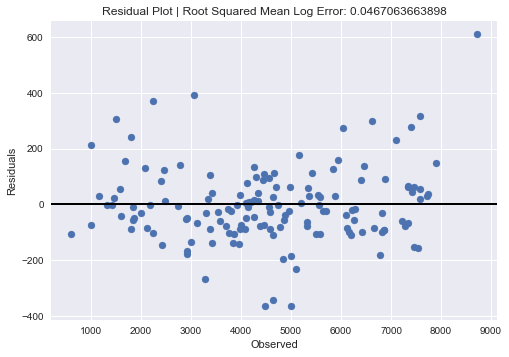

In [23]:
from sklearn.metrics import mean_squared_log_error
 
etr = RandomForestRegressor()
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
print()

# Plot the residuals
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root Squared Mean Log Error: ' + str(np.sqrt(mean_squared_log_error(y_test, y_pred))))
plt.show()

#Considering that the data is not normally distributed, log transformation is used
#RSME for 0.047

# 5. Future Work Improving the model

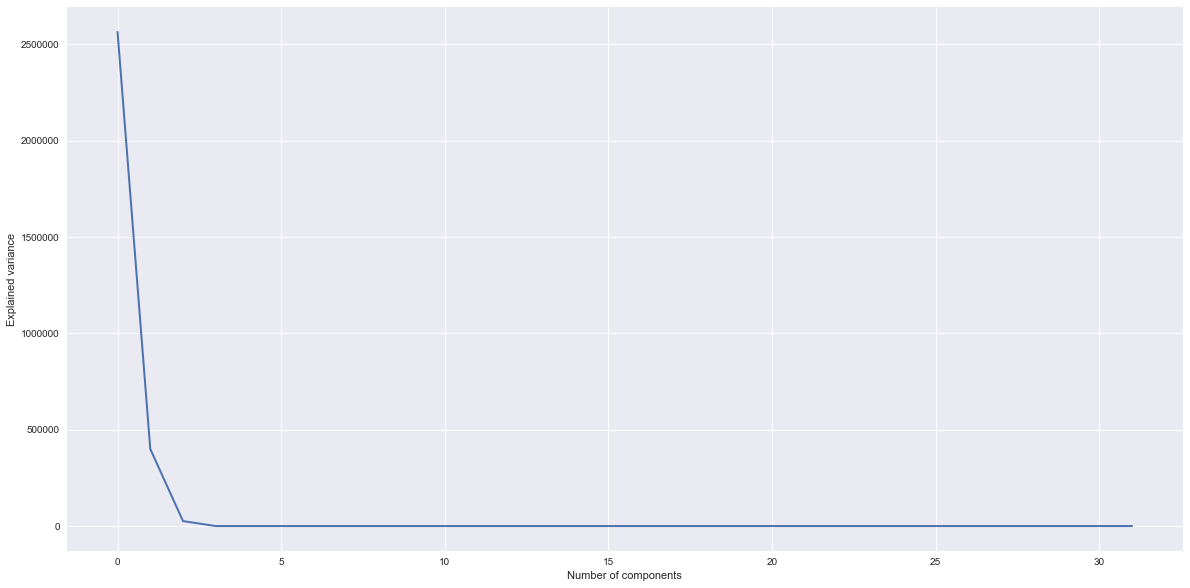

In [24]:
from sklearn import decomposition

# Plot PCA spectrum
pca = decomposition.PCA()
pca.fit(X_train)

plt.figure(1, figsize=(20, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()